In [1]:
import pandas as pd
import numpy as np
import gc

## Reading Main dfs

In [2]:
app = pd.read_csv('../data/application_train.csv')
app_test = pd.read_csv('../data/application_test.csv')

## Under sampling data to balance target
Data is overwhelmingly positive, needs to be balanced. biggest class needs to be resampled with size smaller sample.

Random under-sampling:
0    24825
1    24825
Name: TARGET, dtype: int64


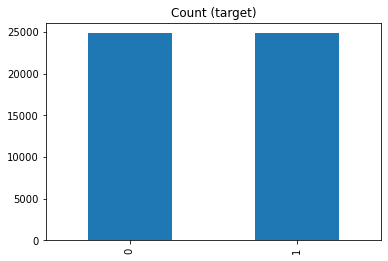

In [3]:
count_0, count_1 = app.TARGET.value_counts()
df_class_0 = app[app['TARGET'] == 0]
df_class_1 = app[app['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_1, random_state=42)
app = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(app.TARGET.value_counts())

app.TARGET.value_counts().plot(kind='bar', title='Count (target)');

## Merging other DFs to Main
those are the keys that connect all dfs

![title](./home_credit.png)

# Data Description


### application_{train|test}.csv
This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.
bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

### bureau_balance.csv
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

### POS_CASH_balance.csv
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

### credit_card_balance.csv
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

### previous_application.csv
All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

### installments_payments.csv
Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [4]:
POS_CASH_balance =  pd.read_csv('../data/POS_CASH_balance.csv')
installments_payments =  pd.read_csv('../data/installments_payments.csv')
installments_payments['MONTHS_BALANCE'] = (installments_payments['DAYS_INSTALMENT']/30).round().astype(int)

bure = pd.read_csv('../data/bureau.csv')
bure_b = pd.read_csv('../data/bureau_balance.csv')

After every df is merged Garbage Collector is involked to release memory

In [6]:
app = pd.merge(app,POS_CASH_balance, how='left', on='SK_ID_CURR')
del POS_CASH_balance
gc.collect()

app = pd.merge(app,installments_payments, how='left', on=['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'])
del installments_payments
gc.collect()

bure = pd.merge(bure,bure_b, how='left', on=['SK_ID_BUREAU'])
del bure_b
gc.collect()

app = pd.merge(app,bure, how='left', on=['SK_ID_CURR','MONTHS_BALANCE'])
del bure
gc.collect()

0

In [9]:
app.MONTHS_BALANCE = app.MONTHS_BALANCE.fillna(0).astype(int)

In [10]:
app.to_csv('../treated_data/df_merged.csv')

## Merging other DFs to app_test

In [ ]:
# df_test = pd.merge(app_test,POS_CASH_balance, how='left')
# df_test = pd.merge(df_test,installments_payments, how='left')
# df_test = pd.merge(df_test,bure, how='left')
# df_test = pd.merge(df_test,bure_b, how='left')

In [ ]:
# df_test.MONTHS_BALANCE = df_test.MONTHS_BALANCE.fillna(0).astype(int)

In [ ]:
# df_test.to_csv('../treated_data/df_merged_test.csv')